In [1]:
from numpy.random import seed
import cv2
from sklearn.model_selection import train_test_split
import os
import numpy as np
import skimage
from skimage.transform import resize
import csv
import itertools
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Fungsi untuk file 87.000 foto

In [2]:
def load_images(directory, counter):
    images = []
    labels = []
    count = 0
    for idx, label in enumerate(uniq_labels):
        print(label," is ready to load")
        count = 0
        for file in os.listdir(directory + "/" + label):
            if count < counter:
              count += 1
              # print(file)
              filepath = directory + "/" + label + "/" + file
              image = cv2.resize(cv2.imread(filepath), (64, 64))
              images.append(image)
              labels.append(idx)
            else:
              break
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [3]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load File dari Train -> 87.000





In [4]:
import keras

!unzip "/content/gdrive/My Drive/smt5/ML/projek ml/asl_alphabet_train.zip"
train_dir = "asl_alphabet_train"

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir, counter = 2000)
print("Data has been loaded")


Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/B/B1391.jpg  
  inflating: asl_alphabet_train/B/B139.jpg  
  inflating: asl_alphabet_train/B/B1388.jpg  
  inflating: asl_alphabet_train/B/B1387.jpg  
  inflating: asl_alphabet_train/B/B1383.jpg  
  inflating: asl_alphabet_train/B/B1382.jpg  
  inflating: asl_alphabet_train/B/B1381.jpg  
  inflating: asl_alphabet_train/B/B1379.jpg  
  inflating: asl_alphabet_train/B/B1373.jpg  
  inflating: asl_alphabet_train/B/B137.jpg  
  inflating: asl_alphabet_train/B/B1367.jpg  
  inflating: asl_alphabet_train/B/B1365.jpg  
  inflating: asl_alphabet_train/B/B1364.jpg  
  inflating: asl_alphabet_train/B/B1363.jpg  
  inflating: asl_alphabet_train/B/B1359.jpg  
  inflating: asl_alphabet_train/B/B1358.jpg  
  inflating: asl_alphabet_train/B/B1356.jpg  
  inflating: asl_alphabet_train/B/B1350.jpg  
  inflating: asl_alphabet_train/B/B1347.jpg  
  inflating: asl_alphabet_train/B/B1341.jpg  
  inflating: asl_alphabet_train

Load File Foto Sendiri

In [5]:
!unzip "/content/gdrive/My Drive/smt5/ML/projek ml/data_test.zip"
test_dir_sen = "data_test"

uniq_labels_sen = sorted(os.listdir(test_dir_sen))
images_sen, labels_sen = load_images(directory = test_dir_sen, counter = 20)
print("Data has been loaded")


Archive:  /content/gdrive/My Drive/smt5/ML/projek ml/data_test.zip
  inflating: data_test/S/S4.jpeg     
  inflating: data_test/S/S3.jpeg     
  inflating: data_test/Q/Q9.jpeg     
  inflating: data_test/S/S9.jpeg     
  inflating: data_test/Q/Q3.jpeg     
  inflating: data_test/S/S5.jpeg     
  inflating: data_test/S/S2.jpeg     
  inflating: data_test/Q/Q10.jpeg    
  inflating: data_test/Q/Q8.jpeg     
  inflating: data_test/Q/Q5.jpeg     
  inflating: data_test/Q/Q4.jpeg     
  inflating: data_test/Q/Q7.jpeg     
  inflating: data_test/Q/Q6.jpeg     
  inflating: data_test/S/S1.jpeg     
  inflating: data_test/Q/Q2.jpeg     
  inflating: data_test/Q/Q14.jpg     
  inflating: data_test/S/S10.jpeg    
  inflating: data_test/Q/Q1.jpeg     
  inflating: data_test/Q/Q12.jpg     
  inflating: data_test/Q/Q11.jpg     
  inflating: data_test/Q/Q18.jpg     
  inflating: data_test/S/S14.jpg     
  inflating: data_test/S/S6.jpeg     
  inflating: data_test/S/S13.jpg     
  inflating: data_tes

UNTUK SET X DAN Y DARI TRAINING UNTUK MENJADI TRAIN DAN TEST (DIBAGI 20% DAN 80%)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

Total number of symbols:  29
Number of training images:  46400
Number of testing images:  11600


UNTUK SET X DAN Y DARI FOTO SENDIRI

In [7]:
n_sen = len(uniq_labels_sen)
X_test_sen,Y_test_sen = images_sen, labels_sen

test_n_sen = len(X_test_sen)

print("Total number of symbols: ", n_sen)
print("Number of testing images: ", test_n_sen)

Total number of symbols:  29
Number of testing images:  580


In [8]:
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


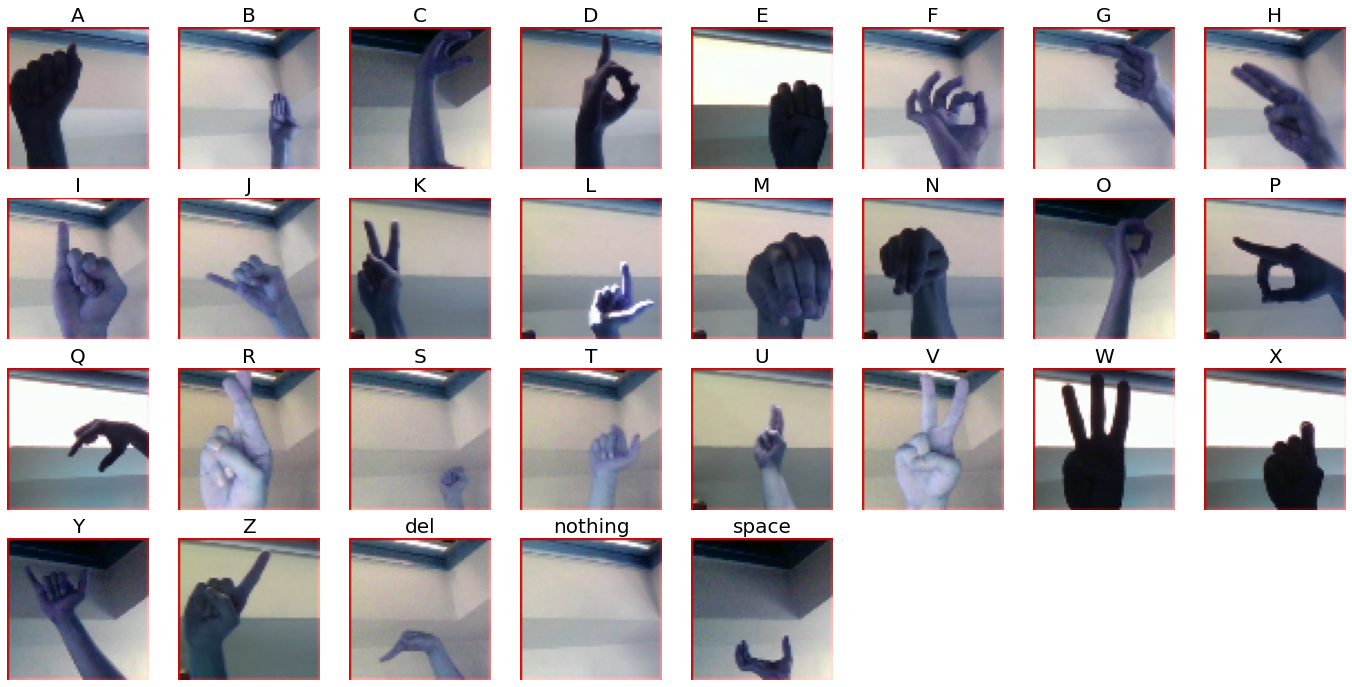

In [9]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


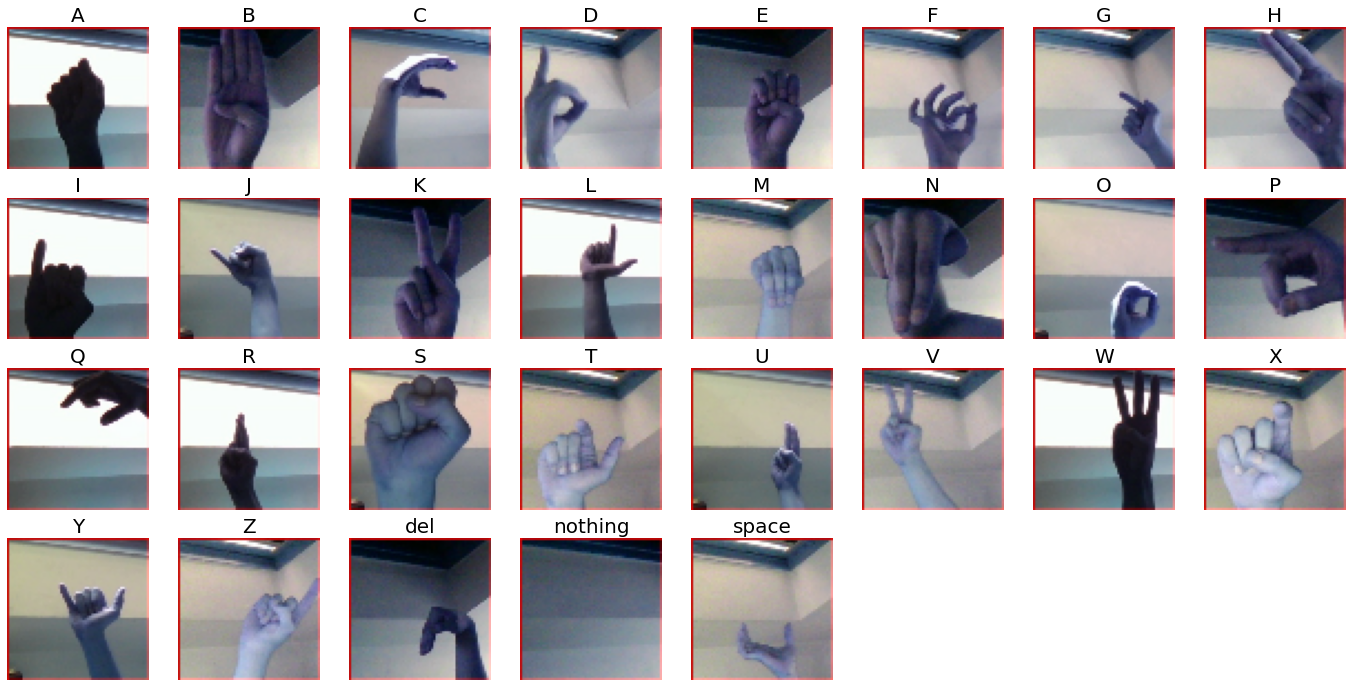

In [10]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
Y_test_sen = to_categorical(Y_test_sen)

In [12]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_test_sen = X_test_sen.astype('float32')/255.0

MODEL COBA"

In [13]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       409728    
                                                        

In [14]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
hist = model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Train on 46400 samples
Epoch 1/5
46400/46400 [==============================] - 72s 2ms/sample - loss: 1.6226 - acc: 0.5162
Epoch 2/5
46400/46400 [==============================] - 58s 1ms/sample - loss: 0.2984 - acc: 0.9028
Epoch 3/5
46400/46400 [==============================] - 58s 1ms/sample - loss: 0.1693 - acc: 0.9460
Epoch 4/5
46400/46400 [==============================] - 58s 1ms/sample - loss: 0.1356 - acc: 0.9590
Epoch 5/5
46400/46400 [==============================] - 58s 1ms/sample - loss: 0.1143 - acc: 0.9685


ACCURACY DATA TRAINING YANG TELAH DI BAGI"

In [16]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy for test images: 99.534 %


ACCURACY DATA FOTO SENDIRI

In [17]:
score_sen = model.evaluate(x = X_test_sen, y = Y_test_sen, verbose = 0)
print('Accuracy for test images:', round(score_sen[1]*100, 3), '%')

Accuracy for test images: 15.517 %


In [18]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

TABEL HASIL PREDIKSI DARI DATA TRAINING YANG DIBAGI 20% DAN 80%

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


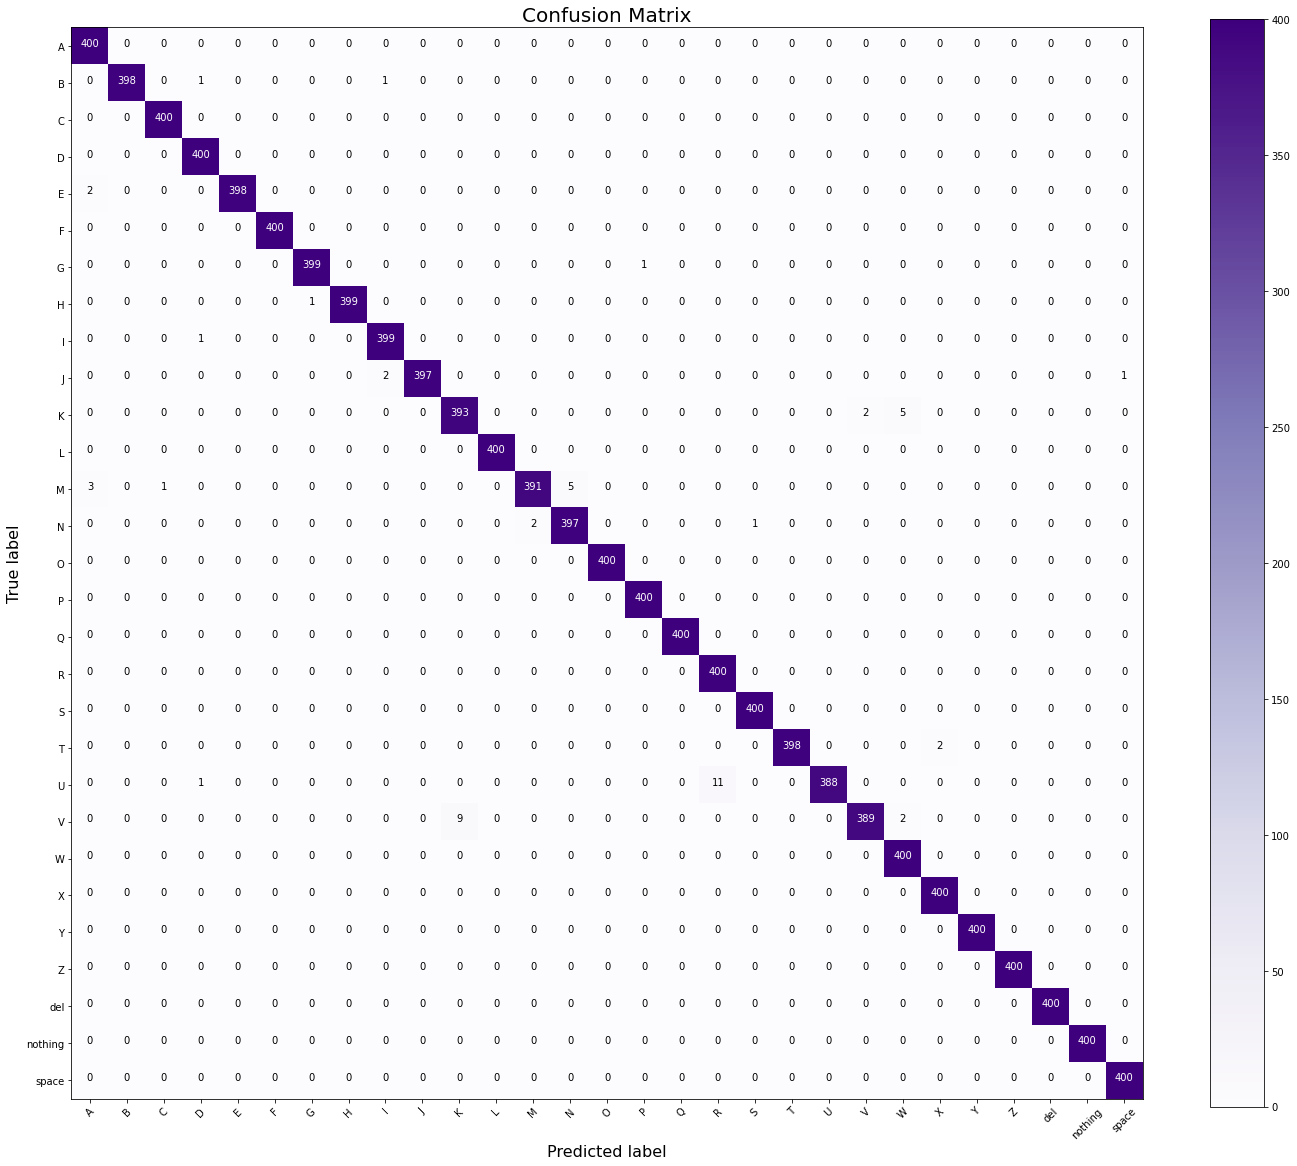

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

TABEL HASIL PREDIKSI DARI DATA FOTO SENDIRI

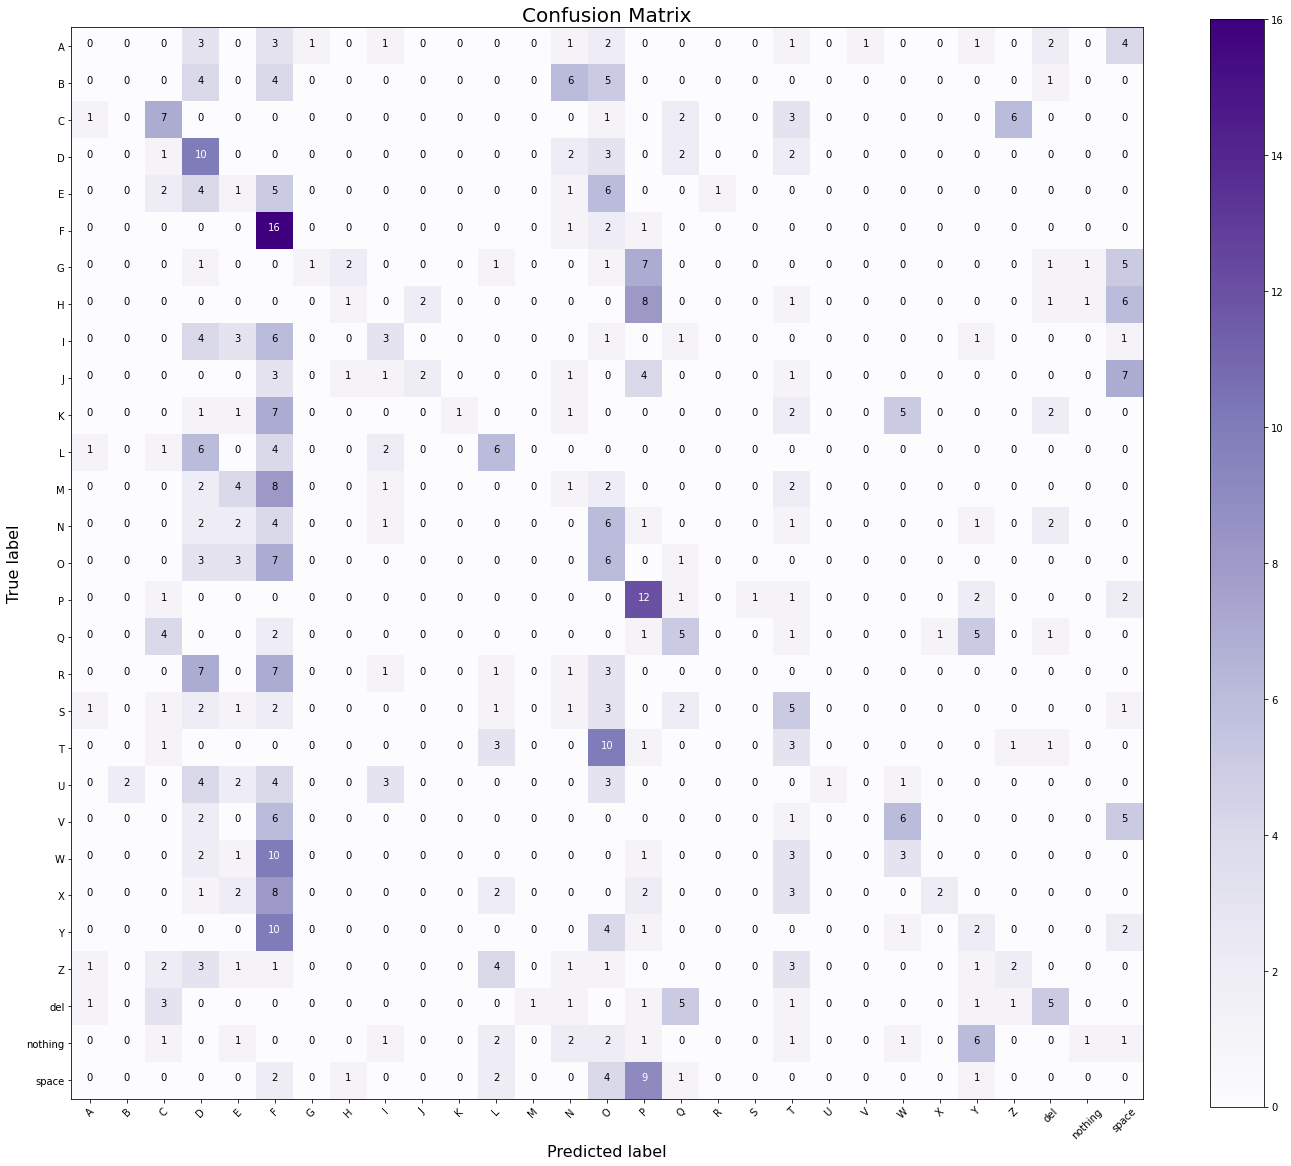

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test_sen, batch_size = 64, verbose = 0)
plot_confusion_matrix(Y_test_sen, y_test_pred)